In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the dataset
data = pd.read_csv("cleaned_data2.csv")

In [4]:
# Preview the data
print("Dataset preview:")
print(data.head())

Dataset preview:
   user_id        date  steps  calories_burned  distance_km  active_minutes  \
0       27  2023-05-24   1405            546.9         1.70              80   
1       64  2023-05-27    909            172.5         1.15              42   
2       32  2023-09-12   3485            327.1         1.38              37   
3       34  2023-05-13   1539            130.1         1.60              39   
4       53  2023-08-05  10980            521.4        13.01             151   

   sleep_hours  heart_rate_avg workout_type weather_conditions location  \
0          7.1              83     Swimming              Sunny     Home   
1          8.3              64         Yoga              Windy   Office   
2          8.8              70      Walking              Sunny     Park   
3          7.3              77         Yoga                Fog     Park   
4          3.1             122      Running              Windy    Other   

       mood  
0     Happy  
1   Neutral  
2     Happy  
3

In [5]:
# Check dataset information
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             5000 non-null   int64  
 1   date                5000 non-null   object 
 2   steps               5000 non-null   int64  
 3   calories_burned     5000 non-null   float64
 4   distance_km         5000 non-null   float64
 5   active_minutes      5000 non-null   int64  
 6   sleep_hours         5000 non-null   float64
 7   heart_rate_avg      5000 non-null   int64  
 8   workout_type        5000 non-null   object 
 9   weather_conditions  5000 non-null   object 
 10  location            5000 non-null   object 
 11  mood                5000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 468.9+ KB
None


##1. How does physical activity (e.g., steps, workout type) affect mood?

In [6]:
# Select relevant columns (steps and workout type)
relevant_columns = ['steps', 'workout_type', 'mood']
data = data[relevant_columns]

In [7]:
# Encode 'workout_type' and 'mood' (categorical variables)
label_encoders = {}
for col in ['workout_type', 'mood']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [8]:
# Define features and target
X = data[['steps', 'workout_type']]  # Features: steps and workout type
y = data['mood']  # Target: mood

In [9]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# Convert target variable for deep learning model
y_train_dl = to_categorical(y_train)
y_test_dl = to_categorical(y_test)

In [12]:
# Random Forest Model
print("\nTraining Random Forest model...")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Training Random Forest model...


In [13]:
# Evaluate Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23       208
           1       0.35      0.36      0.35       352
           2       0.32      0.32      0.32       298
           3       0.19      0.18      0.18       142

    accuracy                           0.29      1000
   macro avg       0.27      0.27      0.27      1000
weighted avg       0.29      0.29      0.29      1000

Random Forest Accuracy: 0.294


In [14]:
# Feature Importance for Random Forest
feature_importances = rf.feature_importances_
print("\nRandom Forest Feature Importances:")
print(f"Steps Importance: {feature_importances[0]:.4f}")
print(f"Workout Type Importance: {feature_importances[1]:.4f}")


Random Forest Feature Importances:
Steps Importance: 0.9958
Workout Type Importance: 0.0042


In [15]:
# Deep Learning Model
print("\nTraining Deep Learning model...")
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train_dl.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_dl, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



Training Deep Learning model...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3436 - loss: 1.3658 - val_accuracy: 0.3512 - val_loss: 1.3439
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3501 - loss: 1.3479 - val_accuracy: 0.3512 - val_loss: 1.3407
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3490 - loss: 1.3452 - val_accuracy: 0.3512 - val_loss: 1.3412
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3611 - loss: 1.3488 - val_accuracy: 0.3512 - val_loss: 1.3390
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3575 - loss: 1.3410 - val_accuracy: 0.3512 - val_loss: 1.3373
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3786 - loss: 1.3386 - val_accuracy: 0.3512 - val_loss: 1.3373
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3705 - loss: 1.3363 - val_accuracy: 0.3512 - val_loss: 1.3389
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3654 - loss: 1.3357 - val_accuracy: 0.3512 - val_

In [16]:
# Evaluate Deep Learning Model
loss, accuracy = model.evaluate(X_test, y_test_dl)
print(f"\nDeep Learning Model Accuracy: {accuracy:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3388 - loss: 1.3434  

Deep Learning Model Accuracy: 0.35


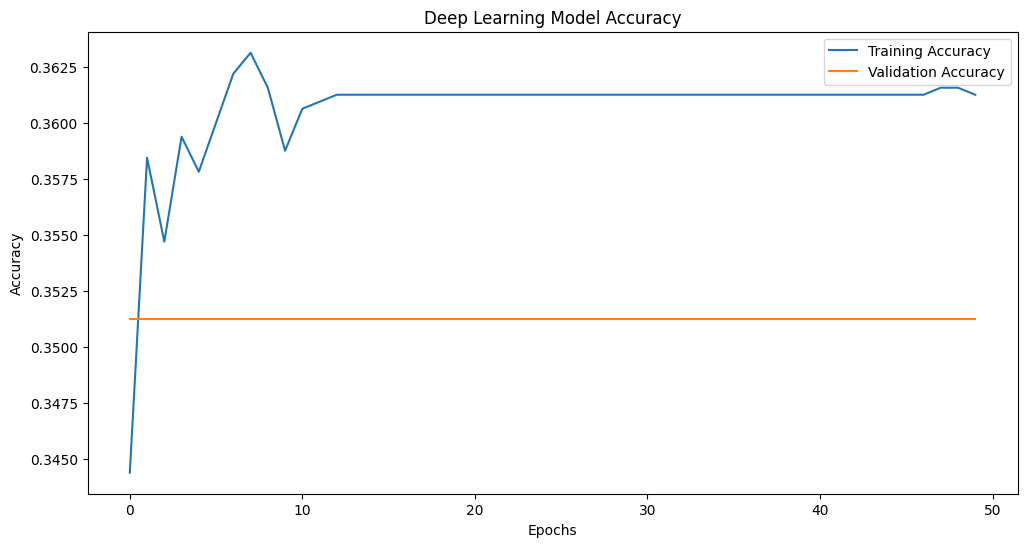

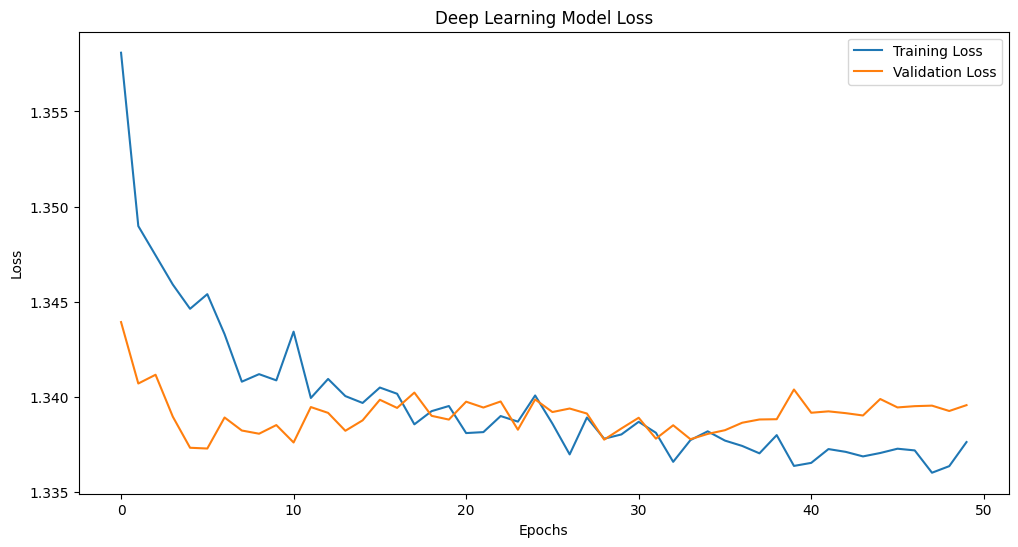

In [17]:
# Plot training history for the deep learning model
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deep Learning Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Deep Learning Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Map Predictions Back to Mood Labels
print("\nMapping Predictions Back to Mood Labels...")
mood_labels = label_encoders['mood'].inverse_transform(y_pred_rf)
print("Sample Predicted Moods (Random Forest):", mood_labels[:5])


Mapping Predictions Back to Mood Labels...
Sample Predicted Moods (Random Forest): ['Happy' 'Neutral' 'Neutral' 'Happy' 'Stressed']


#Which input feature (steps or workout type) has the most impact on mood prediction

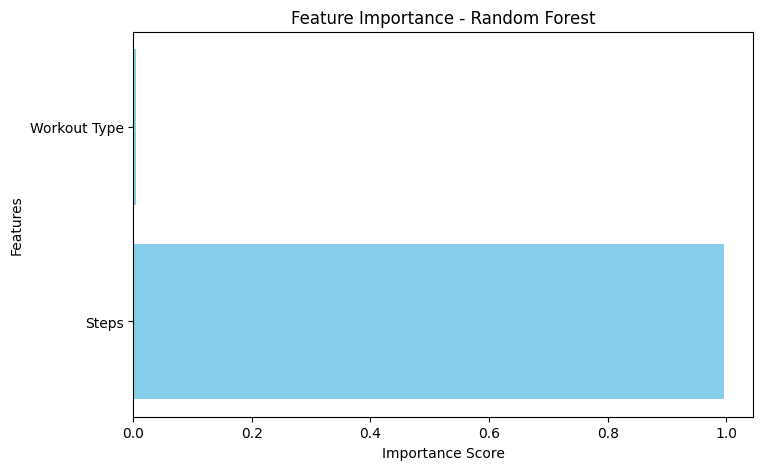

In [19]:
import matplotlib.pyplot as plt

# Feature Importance
feature_importances = rf.feature_importances_
features = ['Steps', 'Workout Type']

plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


#Distribution of mood predictions to understand the model's behavior.



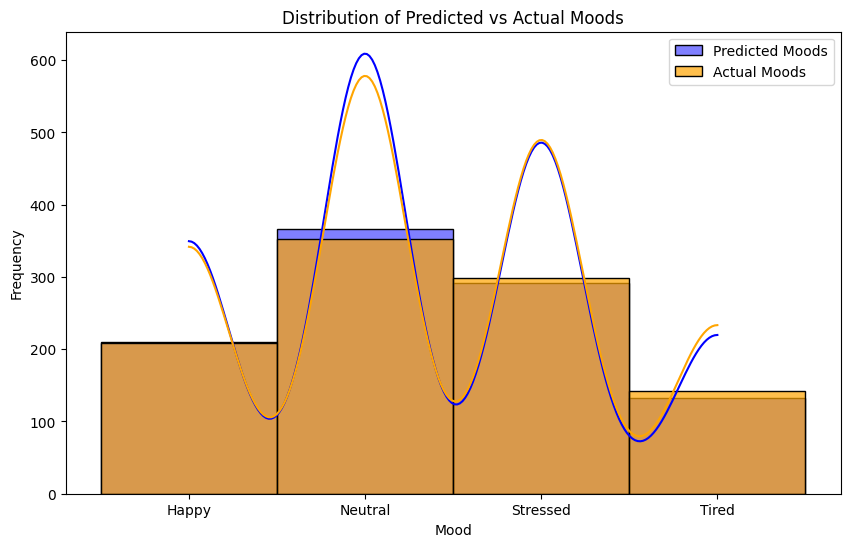

In [20]:
import seaborn as sns

# Map encoded predictions and actual values to original mood labels
predicted_moods_rf = label_encoders['mood'].inverse_transform(y_pred_rf)
actual_moods = label_encoders['mood'].inverse_transform(y_test)

# Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(predicted_moods_rf, color='blue', label='Predicted Moods', kde=True)
sns.histplot(actual_moods, color='orange', label='Actual Moods', kde=True, alpha=0.7)
plt.title('Distribution of Predicted vs Actual Moods')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#How steps correlate with mood.



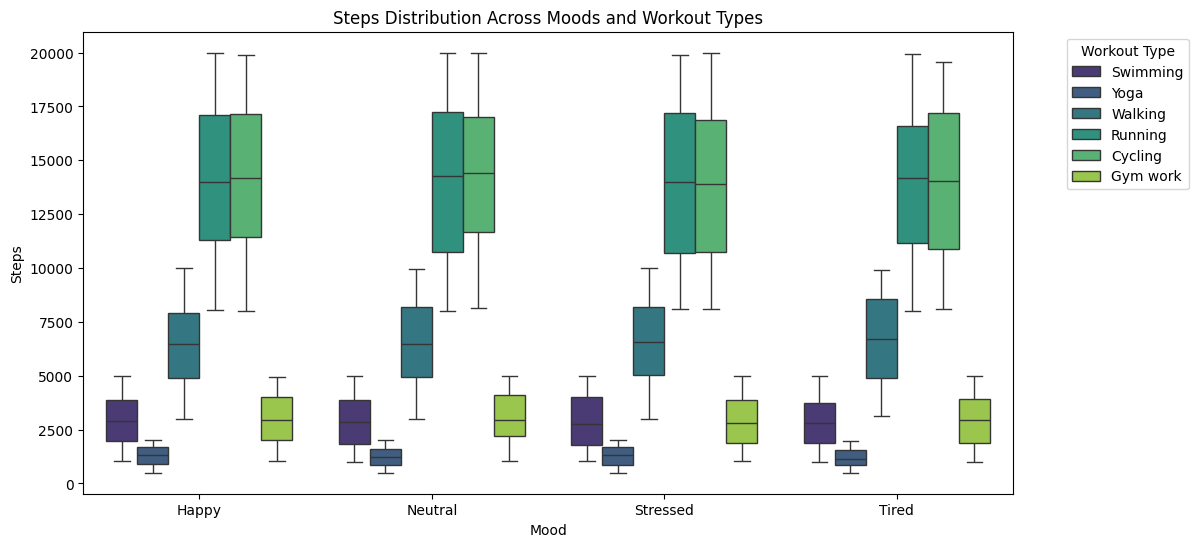

In [21]:
# Add original mood labels to the dataset for visualization
data['mood_label'] = label_encoders['mood'].inverse_transform(data['mood'])
data['workout_label'] = label_encoders['workout_type'].inverse_transform(data['workout_type'])

# Boxplot for Steps vs Mood
plt.figure(figsize=(12, 6))
sns.boxplot(x='mood_label', y='steps', hue='workout_label', data=data, palette='viridis')
plt.title('Steps Distribution Across Moods and Workout Types')
plt.xlabel('Mood')
plt.ylabel('Steps')
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##2. Is there a relationship between sleep hours and heart rate average?


In [23]:
# Load the dataset
data = pd.read_csv("cleaned_data2.csv")

       sleep_hours  heart_rate_avg
count  5000.000000     5000.000000
mean      6.496380       90.884800
std       2.009387       16.873591
min       3.000000       60.000000
25%       4.800000       78.000000
50%       6.500000       89.000000
75%       8.200000      103.000000
max      10.000000      130.000000


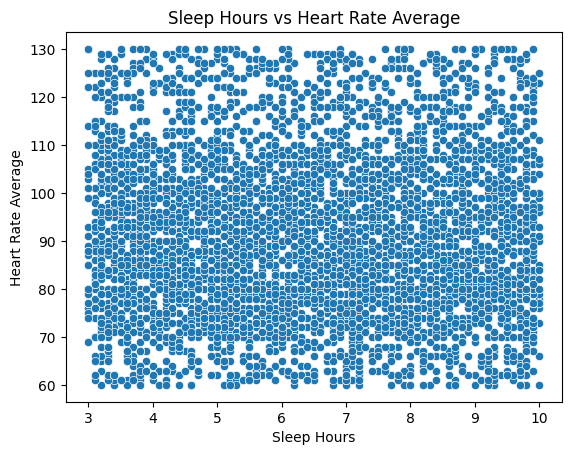

In [24]:
# Data Exploration
print(data[['sleep_hours', 'heart_rate_avg']].describe())
sns.scatterplot(data=data, x="sleep_hours", y="heart_rate_avg")
plt.title("Sleep Hours vs Heart Rate Average")
plt.xlabel("Sleep Hours")
plt.ylabel("Heart Rate Average")
plt.show()

In [25]:
# Statistical Analysis
correlation, p_value = pearsonr(data['sleep_hours'], data['heart_rate_avg'])
print(f"Pearson Correlation: {correlation:.3f}, P-value: {p_value:.3e}")

Pearson Correlation: 0.002, P-value: 8.981e-01


In [26]:
# Data Preparation
data = data[['sleep_hours', 'heart_rate_avg']].dropna()
X = data[['sleep_hours']]
y = data['heart_rate_avg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}, R-squared: {r2:.3f}")

Mean Squared Error: 283.377, R-squared: -0.001


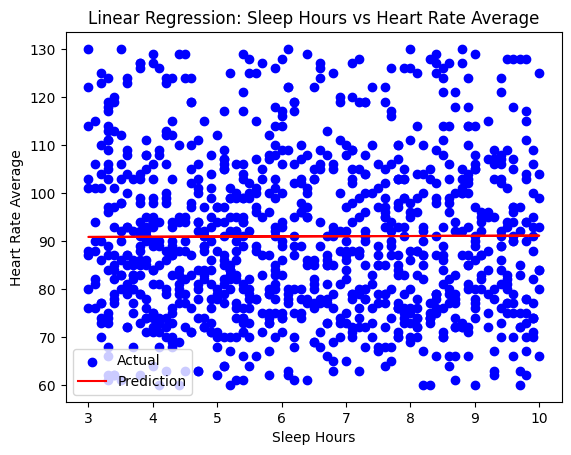

In [29]:
# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Prediction')
plt.title("Linear Regression: Sleep Hours vs Heart Rate Average")
plt.xlabel("Sleep Hours")
plt.ylabel("Heart Rate Average")
plt.legend()
plt.show()

##3. What is the impact of weather conditions on physical activity levels?


In [31]:
# Load the dataset
data = pd.read_csv("cleaned_data2.csv")

In [32]:
# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [35]:
# Create a mapping from encoded values to actual weather condition names
weather_mapping = {index: label for index, label in enumerate(label_encoders['weather_conditions'].classes_)}

## --- Exploratory Data Analysis ---


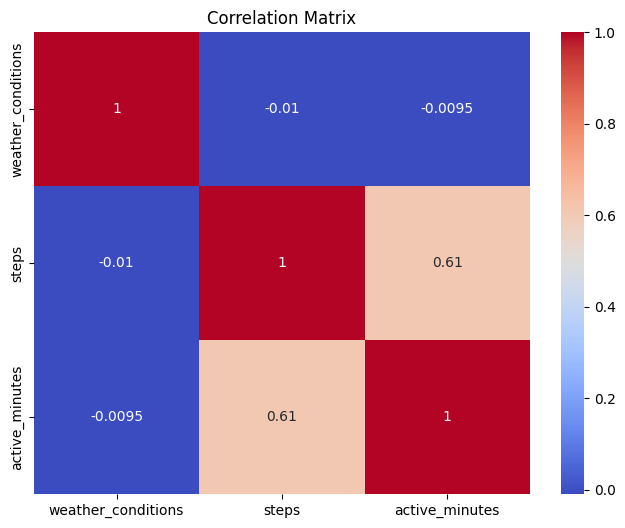

In [36]:
# Correlation matrix
plt.figure(figsize=(8, 6))
corr = data[['weather_conditions', 'steps', 'active_minutes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Group activity metrics by weather conditions
weather_grouped = data.groupby('weather_conditions')[['steps', 'active_minutes']].mean()


In [38]:
# Replace numeric index with actual weather condition names
weather_grouped.index = weather_grouped.index.map(weather_mapping)


In [39]:
print("\nAverage Steps and Active Minutes by Weather Conditions (Actual Names):")
print(weather_grouped)


Average Steps and Active Minutes by Weather Conditions (Actual Names):
                          steps  active_minutes
weather_conditions                             
Fog                 7182.285571       81.806613
Rainy               7063.568134       81.959119
Snowy               7128.529858       82.494787
Sunny               6857.580547       80.715299
Windy               7080.685885       81.068588


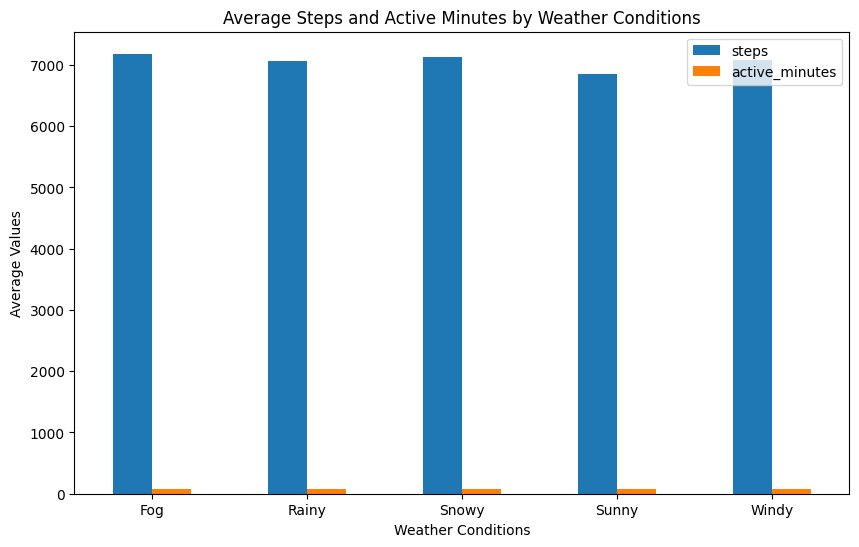

In [40]:
# Visualize grouped data
weather_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average Steps and Active Minutes by Weather Conditions')
plt.ylabel('Average Values')
plt.xlabel('Weather Conditions')
plt.xticks(rotation=0)
plt.show()

# --- Regression Analysis ---


In [41]:
# Regression to predict active minutes based on weather conditions
X_reg = data[['weather_conditions']]
y_reg = data['active_minutes']

In [42]:
# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [43]:
# Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [44]:
# Predictions and evaluation
y_pred_reg = reg_model.predict(X_test_reg)

print("\nRegression Analysis:")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("Regression Coefficient Analysis with Weather Conditions:")
for index, coeff in enumerate(reg_model.coef_):
    print(f"Impact of Weather Condition {weather_mapping[index]}: {coeff:.2f}")



Regression Analysis:
Mean Squared Error: 1557.0874158275205
Regression Coefficient Analysis with Weather Conditions:
Impact of Weather Condition Fog: -0.38


# --- Classification Model ---


In [45]:
# Features and target for classification
X_clf = data[['weather_conditions', 'steps', 'active_minutes']]
y_clf = data['workout_type']

In [46]:
# Scale numerical features
scaler = StandardScaler()
X_clf[['steps', 'active_minutes']] = scaler.fit_transform(X_clf[['steps', 'active_minutes']])

<ipython-input-46-3f5998bb4284>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clf[['steps', 'active_minutes']] = scaler.fit_transform(X_clf[['steps', 'active_minutes']])


In [47]:
# Train-test split for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

In [48]:
# Train Random Forest Classifier
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [50]:
# Predictions
y_pred_clf = clf_model.predict(X_test_clf)

In [53]:
# Evaluate classification model
print("\nClassification Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_clf))
print("Accuracy Score:", accuracy_score(y_test_clf, y_pred_clf))


Classification Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       176
           1       0.47      0.35      0.40       162
           2       0.48      0.46      0.47       154
           3       0.51      0.56      0.54       170
           4       0.76      0.79      0.77       173
           5       0.85      0.96      0.90       165

    accuracy                           0.61      1000
   macro avg       0.60      0.61      0.60      1000
weighted avg       0.60      0.61      0.61      1000

Confusion Matrix:
[[ 97   0  72   0   7   0]
 [  0  56   0  73  18  15]
 [ 80   0  71   0   3   0]
 [  0  45   0  96  16  13]
 [  2  16   4  14 137   0]
 [  0   2   0   5   0 158]]
Accuracy Score: 0.615


<ipython-input-54-f38c0a653592>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


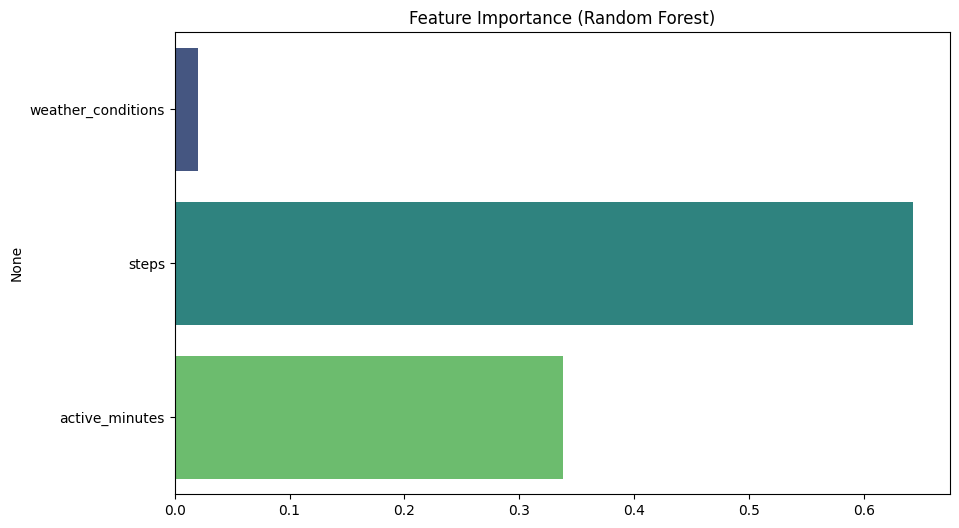

In [54]:
# Feature importance
importances = clf_model.feature_importances_
feature_names = X_clf.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()